In [375]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [376]:
#Load the data from Country-data.csv
data = pd.DataFrame(pd.read_csv('Country-data.csv'))
data.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [377]:
#Check for duplicates values
data.duplicated().sum()
# No duplicate values found

0

In [378]:
#Check the shape of the dataframe
data.shape

(167, 10)

In [379]:
#Check for the different datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [380]:
#Describe the data in the dataframe
data.describe()
#We see the huge difference between 75% and max. This indicates the presence of outliers in our data.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [381]:
#Check for the sum of null values in each column
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [382]:
#Let's use EDA to find out 10 countries having lowest results for each factor

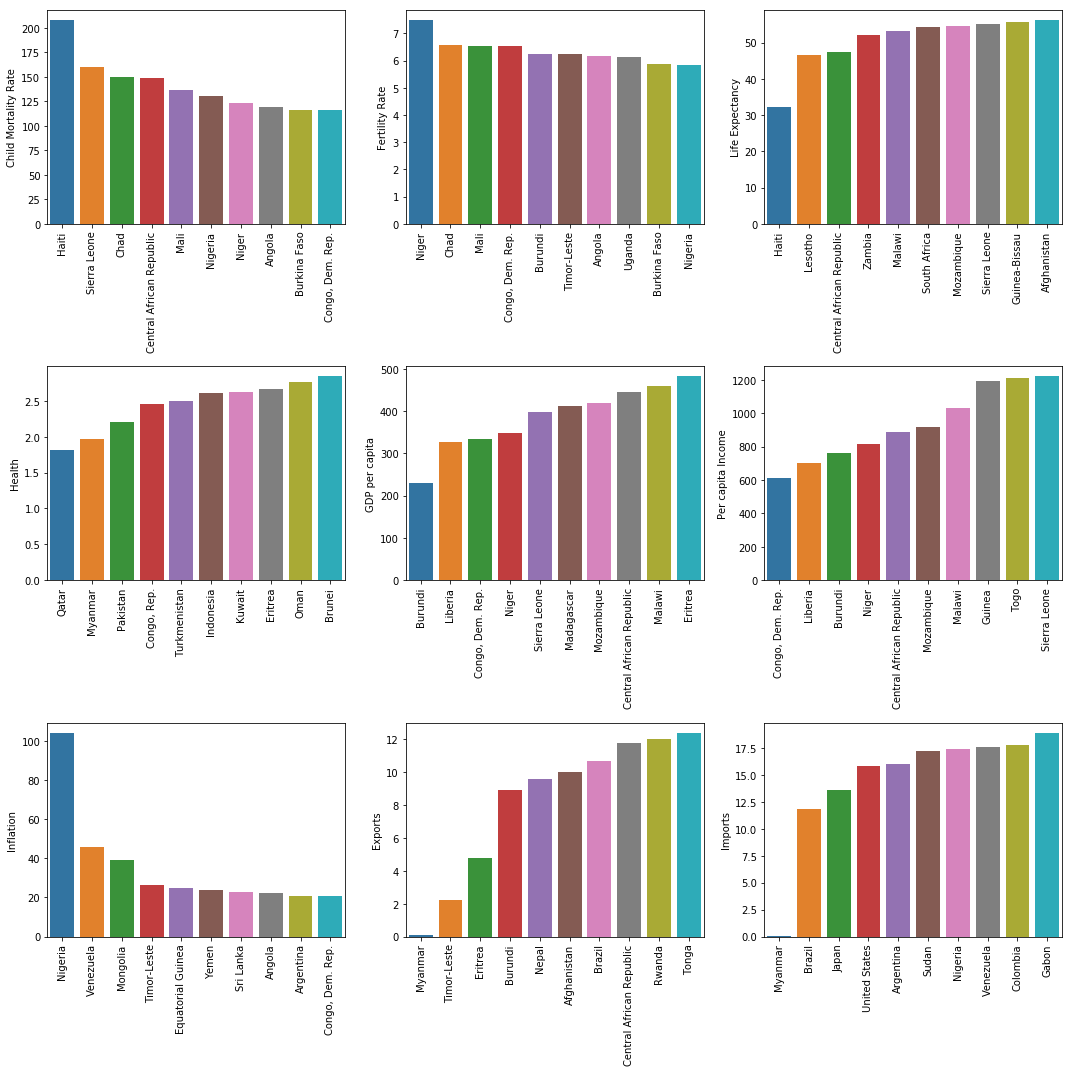

In [383]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate-

top10_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate-
top10_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy-

bottom10_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health-

bottom10_health = data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita-

bottom10_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income-

bottom10_income = data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation-

top10_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports-

bottom10_exports = data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports-

bottom10_imports = data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

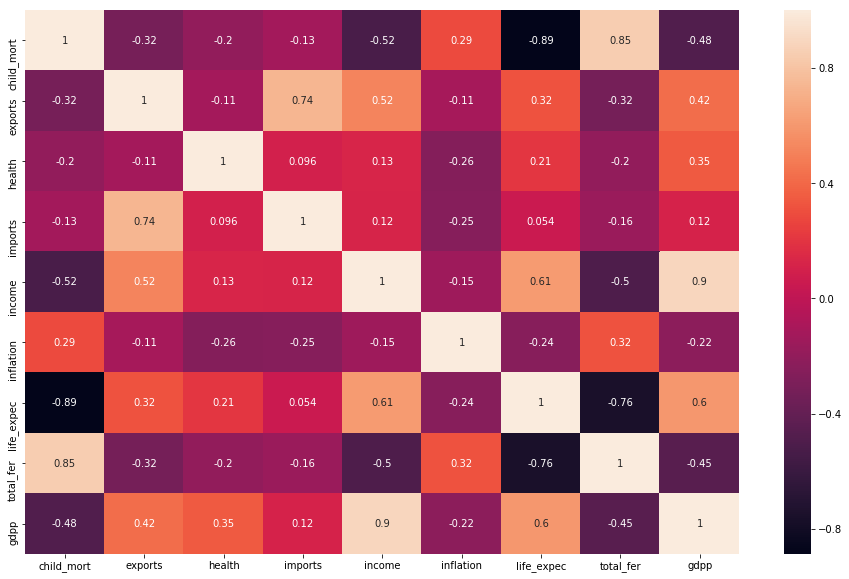

In [384]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True)
plt.savefig('corrplot')
plt.show()

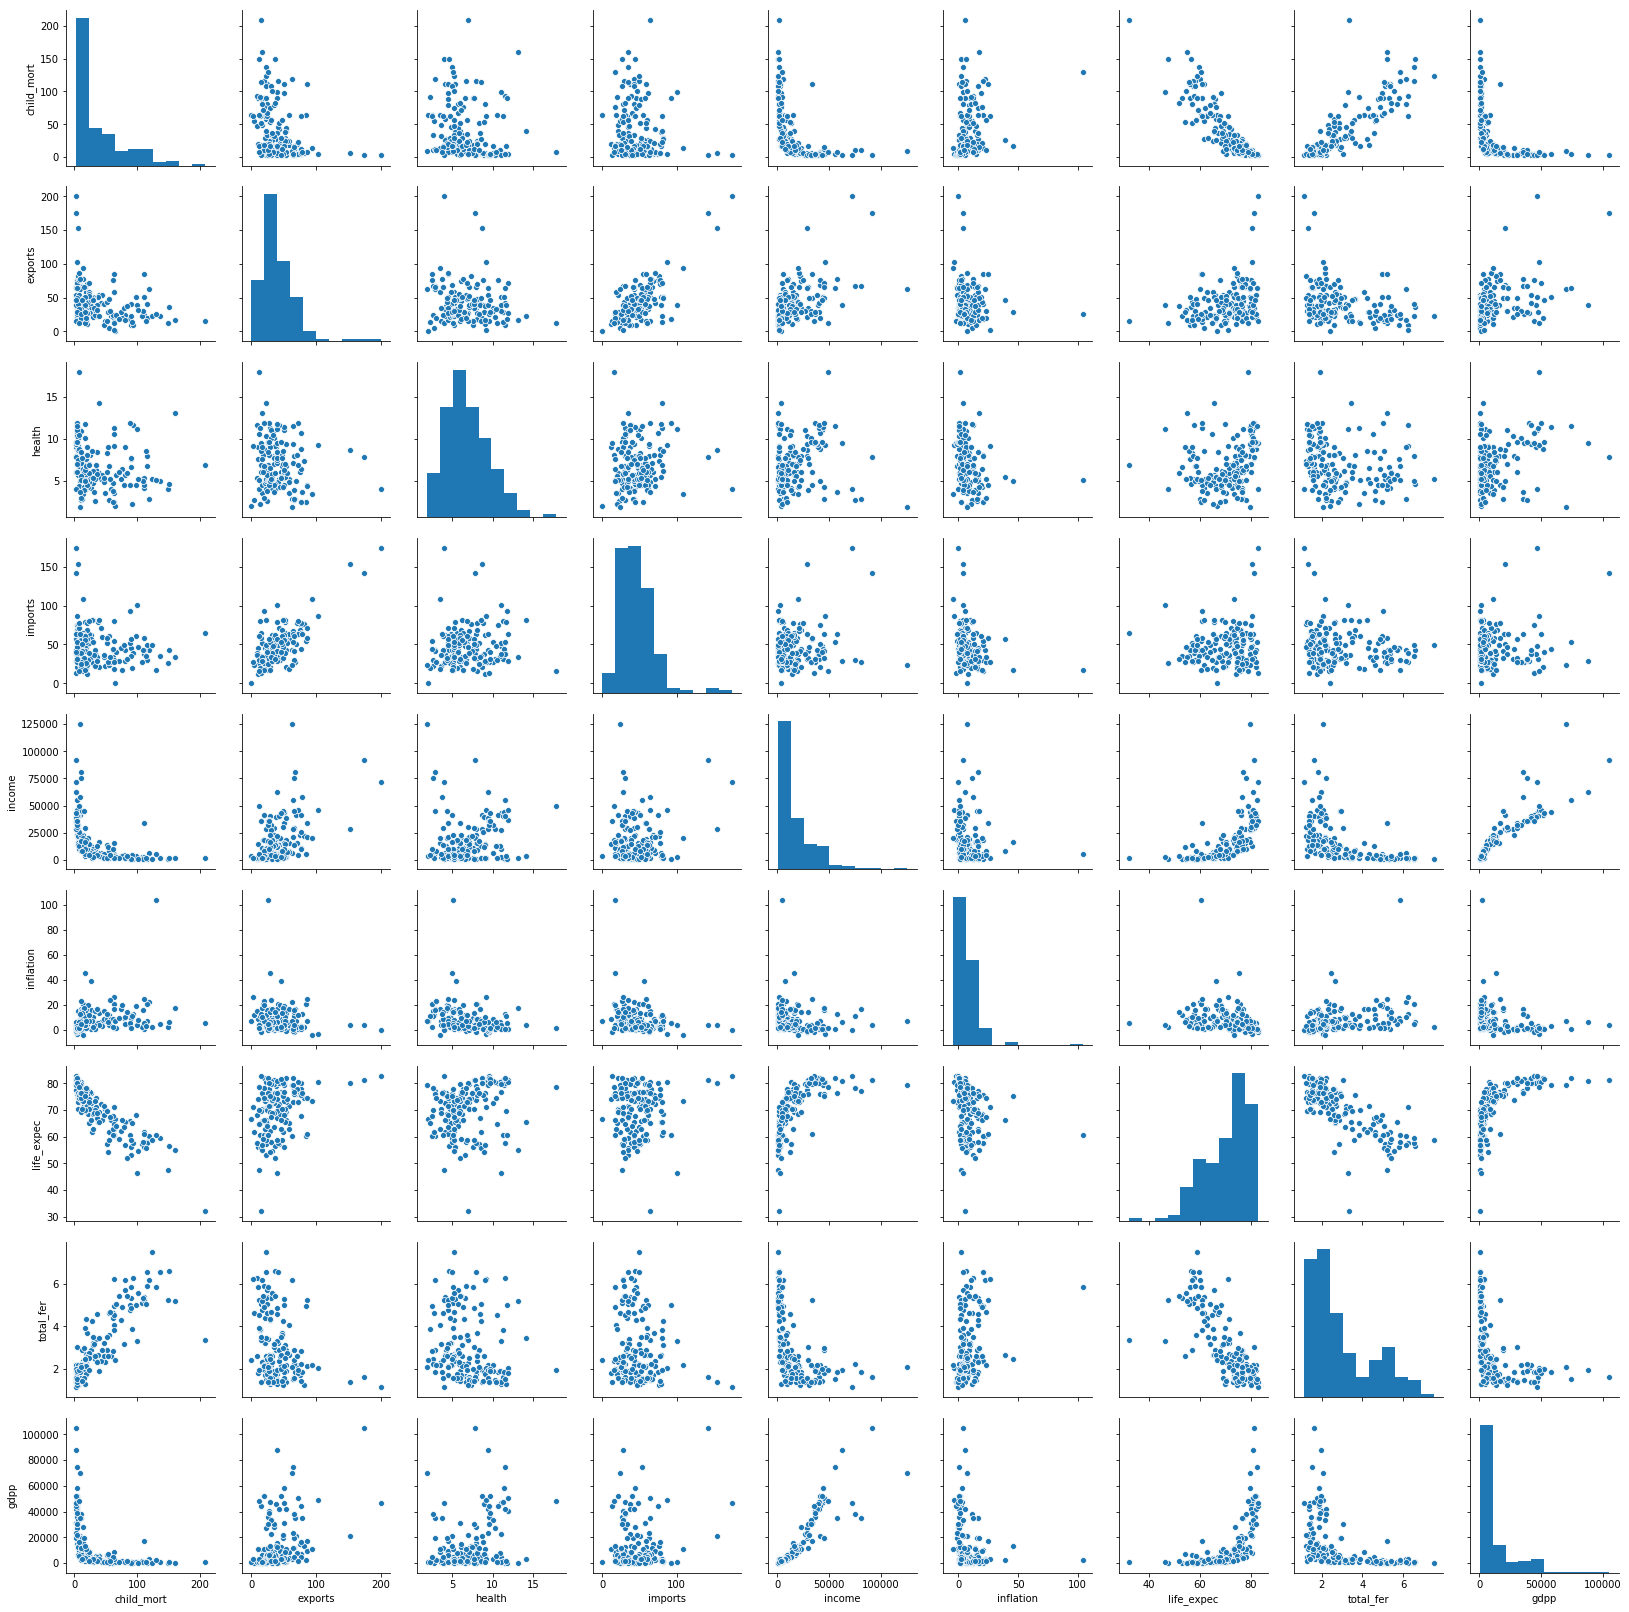

In [385]:
#Let's plot a pair plot for all our variables to look for some relationships
sns.pairplot(data)
plt.show()

In [386]:
#We see a lot of co-relation between variables.

In [387]:
#Let's check for outliers and treat them.
data.describe()
#We see a lot of outliers. We cannot simply remove this data as some countries in dire need of aid may get removed. Hence, we cap them using the higher-lower limits.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [388]:
# Before manipulating data, we will save a copy of orignal data.
df = data.copy()
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


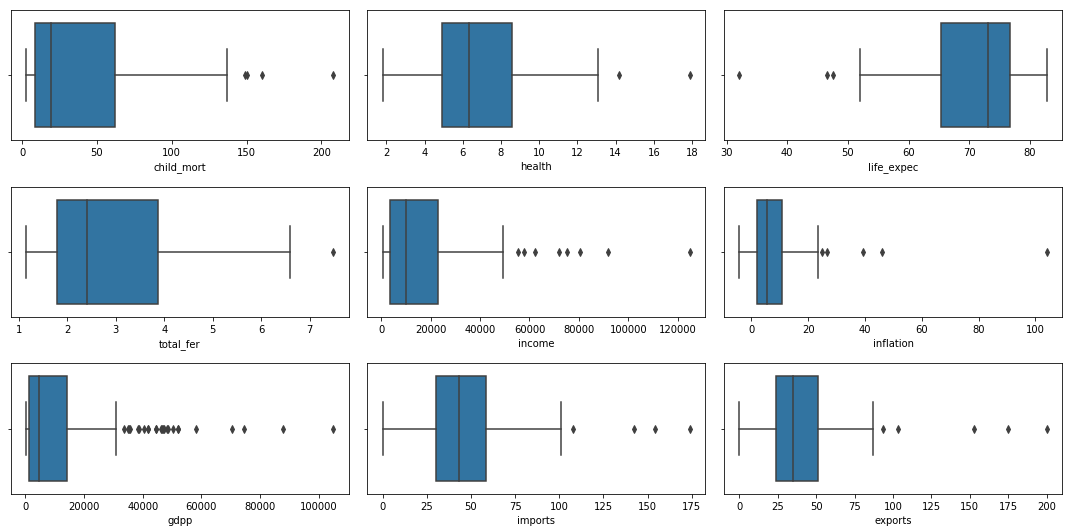

In [389]:
#Let's plot boxplots for outliers-
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])

plt.tight_layout()

In [390]:
#Treat the outliers
percentiles = df['child_mort'].quantile([0.05,0.95]).values
df['child_mort'][df['child_mort'] <= percentiles[0]] = percentiles[0]
df['child_mort'][df['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = df['health'].quantile([0.05,0.95]).values
df['health'][df['health'] <= percentiles[0]] = percentiles[0]
df['health'][df['health'] >= percentiles[1]] = percentiles[1]

percentiles = df['life_expec'].quantile([0.05,0.95]).values
df['life_expec'][df['life_expec'] <= percentiles[0]] = percentiles[0]
df['life_expec'][df['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = df['total_fer'].quantile([0.05,0.95]).values
df['total_fer'][df['total_fer'] <= percentiles[0]] = percentiles[0]
df['total_fer'][df['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = df['income'].quantile([0.05,0.95]).values
df['income'][df['income'] <= percentiles[0]] = percentiles[0]
df['income'][df['income'] >= percentiles[1]] = percentiles[1]

percentiles = df['inflation'].quantile([0.05,0.95]).values
df['inflation'][df['inflation'] <= percentiles[0]] = percentiles[0]
df['inflation'][df['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = df['gdpp'].quantile([0.15,0.85]).values
df['gdpp'][df['gdpp'] <= percentiles[0]] = percentiles[0]
df['gdpp'][df['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = df['imports'].quantile([0.05,0.95]).values
df['imports'][df['imports'] <= percentiles[0]] = percentiles[0]
df['imports'][df['imports'] >= percentiles[1]] = percentiles[1]

percentiles = df['exports'].quantile([0.05,0.95]).values
df['exports'][df['exports'] <= percentiles[0]] = percentiles[0]
df['exports'][df['exports'] >= percentiles[1]] = percentiles[1]

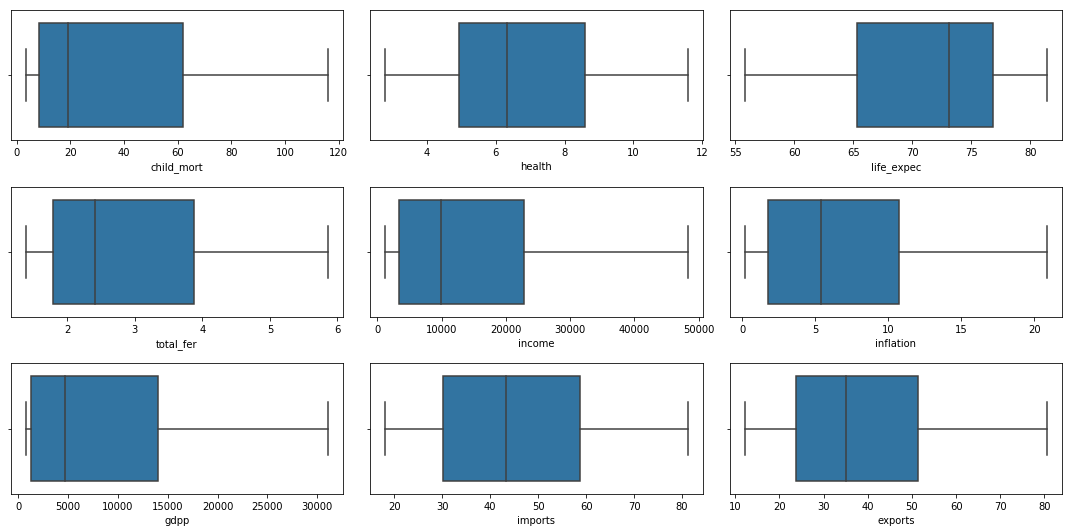

In [391]:
#Plot boxplots again
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])

plt.tight_layout()

In [392]:
#Describe the dataframe
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,36.808623,39.310838,6.767419,45.364251,15755.491018,7.016075,70.830060,2.922389,10081.164671
std,36.193830,19.886059,2.529308,18.303537,14770.353771,6.271398,8.039216,1.438264,10986.572065
min,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,767.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,31090.000000


In [393]:
#Let's start with PCA now-

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
df[varlist] = scaler.fit_transform(df[varlist])

In [394]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [395]:
# Putting feature variable to X
X = df.drop(['country'],axis=1)

# Putting response variable to y
y = df['country']

In [396]:
#Doing the PCA on the train data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [397]:
#Let's look at the PCA components
pca.components_

array([[-0.42094083,  0.23196513,  0.17631527,  0.09199206,  0.40820717,
        -0.2213738 ,  0.43043713, -0.40605377,  0.40454437],
       [-0.04169334, -0.59438886,  0.16855337, -0.73963739,  0.10982317,
         0.0961076 ,  0.13642432, -0.01763726,  0.17108291],
       [-0.07409888,  0.31765799, -0.64969644, -0.25905848,  0.19785663,
         0.59188365,  0.09382053, -0.03983458,  0.06725622],
       [ 0.38634248,  0.23999969,  0.34372164,  0.00385876,  0.4292998 ,
         0.16830071, -0.223033  ,  0.44837615,  0.4599694 ],
       [-0.21154839, -0.00968941,  0.55828433,  0.19284246, -0.1413856 ,
         0.72341069,  0.06995821, -0.15022886, -0.18843569],
       [ 0.08004249,  0.51111121,  0.2411566 , -0.49792203, -0.08100789,
        -0.13213308, -0.42952182, -0.43418602, -0.17101975],
       [ 0.1294767 , -0.40953569, -0.16623226,  0.30131886,  0.25437752,
         0.12453335, -0.53180295, -0.53828461,  0.21049682],
       [-0.77249306, -0.02146279, -0.02424858, -0.03685065,  0

In [398]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.420941,-0.041693,child_mort
1,0.231965,-0.594389,exports
2,0.176315,0.168553,health
3,0.091992,-0.739637,imports
4,0.408207,0.109823,income


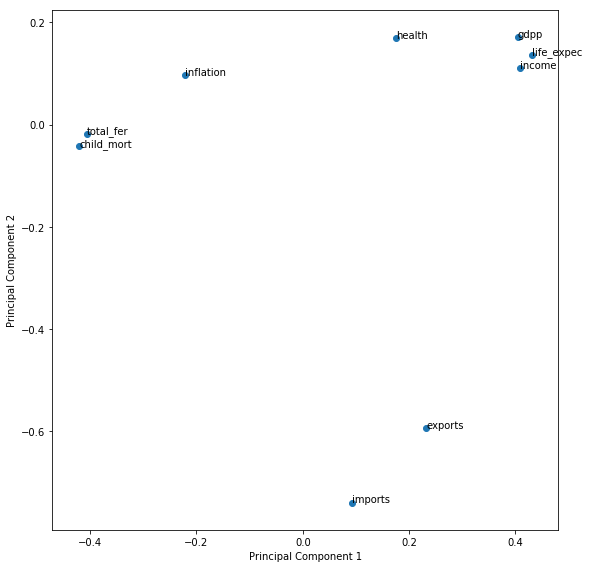

In [399]:
#Scatterplot
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [400]:
#Check the explained variance ratio
pca.explained_variance_ratio_

array([0.4959764 , 0.16309582, 0.13940469, 0.09229846, 0.06353681,
       0.01836273, 0.01548196, 0.00867565, 0.00316748])

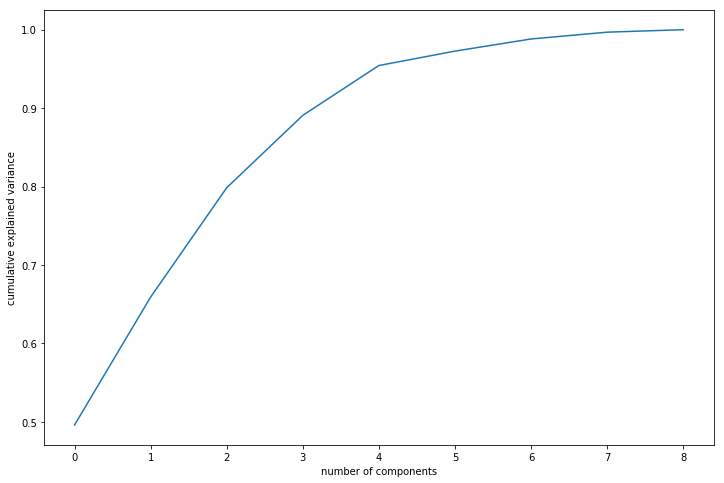

In [401]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [402]:
# Looking at the screeplot, we can observe that 4 components are enough to describe 90% of the variance.

In [403]:
#Using incremental PCA for efficiency -
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [404]:
#Transform
df_pca = pca_final.fit_transform(X)
df_pca.shape

(167, 4)

In [405]:
#Check the df
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-3.313905,-0.371312,-1.011784,0.919878
1,0.466828,-0.180041,-0.353871,-1.414189
2,-0.446043,-0.489471,1.786616,-0.668263
3,-3.357180,1.241380,2.103274,1.630121
4,1.310838,0.665120,-0.275081,-0.711504


In [406]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

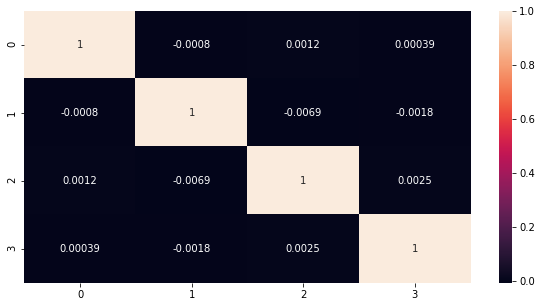

In [407]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)
#As expected, there is no correlation

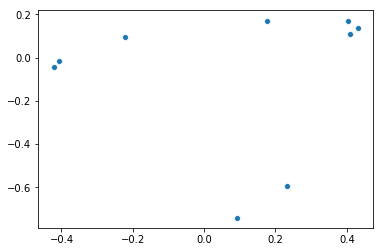

In [428]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x=pca.components_[0],y=pca.components_[1],data=df_pca)

In [409]:
#Some distinct clusters are already visible to us.
#Let's go ahead and begin with the clustering process
# Perform KMeans clustering 
from sklearn.cluster import KMeans

In [410]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [411]:
hopkins(df_pca)
#As the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

0.7205425267382227

In [412]:
#K-means
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

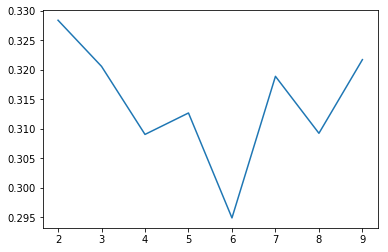

In [413]:
#Plot graph for silhouette
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
#The silhouette score reaches a peak at around 2 clusters indicating that it might be the ideal number of clusters.

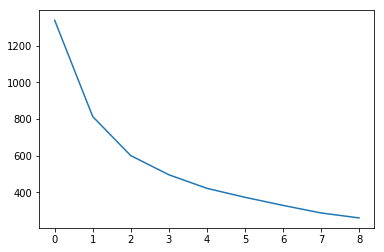

In [429]:
#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

#A distinct elbow is formed at around 3-5 clusters.

In [430]:
#Let's perform K means using K=3
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [431]:
#Let's perform K means using K=4
model_clus2 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus2.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [432]:
#Let's perform K means using K=5
model_clus2 = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
model_clus2.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

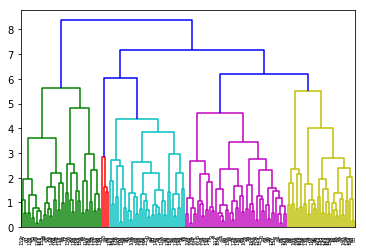

In [416]:
#Let's also check the same using Hierarchical Clustering-

mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [417]:
# Looking at the dedrogram it is observed that cutting it at n = 4 is most optimum.

In [418]:
#perform concatenation
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4 ).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.313905,-0.371312,-1.011784,0.919878,0
1,0.466828,-0.180041,-0.353871,-1.414189,1
2,-0.446043,-0.489471,1.786616,-0.668263,1
3,-3.357180,1.241380,2.103274,1.630121,0
4,1.310838,0.665120,-0.275081,-0.711504,1


In [419]:
#Join with country name
pca_cluster_hc = pd.concat([df['country'],df_pca_hc], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.313905,-0.371312,-1.011784,0.919878,0
1,Albania,0.466828,-0.180041,-0.353871,-1.414189,1
2,Algeria,-0.446043,-0.489471,1.786616,-0.668263,1
3,Angola,-3.357180,1.241380,2.103274,1.630121,0
4,Antigua and Barbuda,1.310838,0.665120,-0.275081,-0.711504,1


In [420]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [421]:
#Analysis of clusters-

hc_clusters_child_mort = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp =  	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [422]:
#add to df
df = pd.concat([pd.Series(list(range(0,4))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df


,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,90.847619,28.807381,5.969048,37.895238,4081.500000,13.240357,60.333333,5.117381,1946.738095
1,1,20.541176,30.188020,6.421569,38.381684,11892.745098,7.833804,73.754902,2.139608,6344.470588
2,2,5.945000,58.262500,8.397750,50.342500,44685.000000,3.569300,79.642500,1.830750,40212.500000
3,3,37.944118,52.505882,6.591471,66.702941,8759.117647,5.916912,67.694118,2.795000,4446.558824


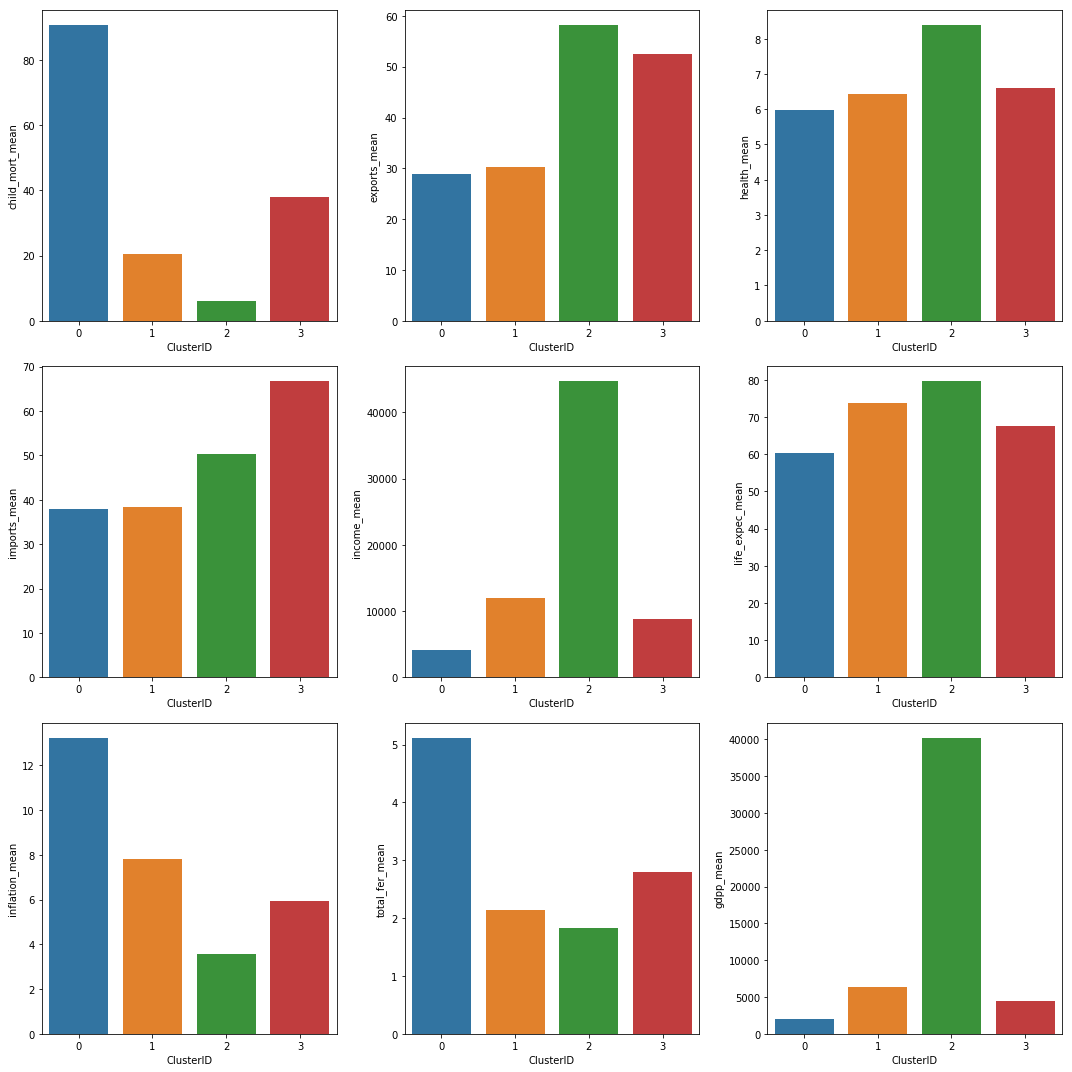

In [423]:
#Create plots
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.ClusterID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [424]:
#Based on the above plots, looks like Cluster 0 is in dire need of aid.
#Cluster 0 countries have low gdpp, low income, low imports, low exports, high inflation, high child mort. etc.

In [425]:
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values
#List of countries in need of aid

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Iraq', 'Kenya', 'Lao', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Uganda',
       'Yemen', 'Zambia'], dtype=object)

In [426]:
clustered_data_hc[clustered_data_hc.ClusterID==0].country.nunique()
#Total number of countries in dire need of aid.

42